In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df=pd.read_parquet(r'C:\Users\91706\Data Analytics Practice\databases\python\crime data\Crime_Data_from_2020_to_Present.parquet')

In [12]:
df.isnull().sum()

DR_NO             0
Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Rpt Dist No       0
Part 1-2          0
Crm Cd            0
Crm Cd Desc       0
Mocodes           0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            0
Status Desc       0
Crm Cd 1          0
LOCATION          0
LAT               0
LON               0
occ_year          0
occ_month         0
occ_date          0
occ_day           0
dtype: int64

In [13]:
print(f'Number Of Rows: {df.shape[0]}\n Number Of Columns: {df.shape[1]}')

Number Of Rows: 1004991
 Number Of Columns: 28


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   DR_NO           1004991 non-null  int64         
 1   Date Rptd       1004991 non-null  datetime64[ns]
 2   DATE OCC        1004991 non-null  datetime64[ns]
 3   TIME OCC        1004991 non-null  object        
 4   AREA            1004991 non-null  int64         
 5   AREA NAME       1004991 non-null  object        
 6   Rpt Dist No     1004991 non-null  int64         
 7   Part 1-2        1004991 non-null  int64         
 8   Crm Cd          1004991 non-null  int64         
 9   Crm Cd Desc     1004991 non-null  object        
 10  Mocodes         1004991 non-null  object        
 11  Vict Age        1004991 non-null  int64         
 12  Vict Sex        1004991 non-null  object        
 13  Vict Descent    1004991 non-null  object        
 14  Premis Cd       10

- Yearly Crime Distribution

In [17]:
plot1=df.groupby('occ_year').size().reset_index(name='count')
plot1

,occ_year,count
0,2020,199847
1,2021,209876
2,2022,235259
3,2023,232345
4,2024,127567
5,2025,97


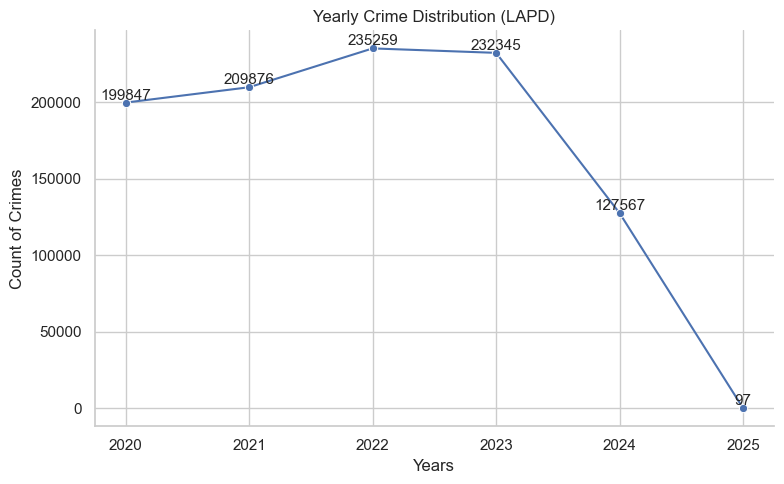

In [242]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(8,5))
ax=sns.lineplot(data=plot1,x='occ_year',y='count',marker='o')

plt.xlabel('Years')
plt.ylabel('Count of Crimes')
plt.title('Yearly Crime Distribution (LAPD)')

[plt.text(x, y, int(y), ha='center', va='bottom', fontsize=11) for x, y in zip(plot1['occ_year'], plot1['count'])]

sns.despine()
plt.tight_layout()
plt.show()   

- Month-wise Crime Volume

In [62]:
df['occ_month']=pd.Categorical(df['occ_month'],
                               categories=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
                                ordered=True)

plot2=df.groupby('occ_month',observed=True).size().reset_index(name='count')
plot2

,occ_month,count
0,Jan,92701
1,Feb,86401
2,Mar,87818
3,Apr,83518
4,May,83013
5,Jun,81382
6,Jul,83962
7,Aug,83850
8,Sep,81015
9,Oct,84127


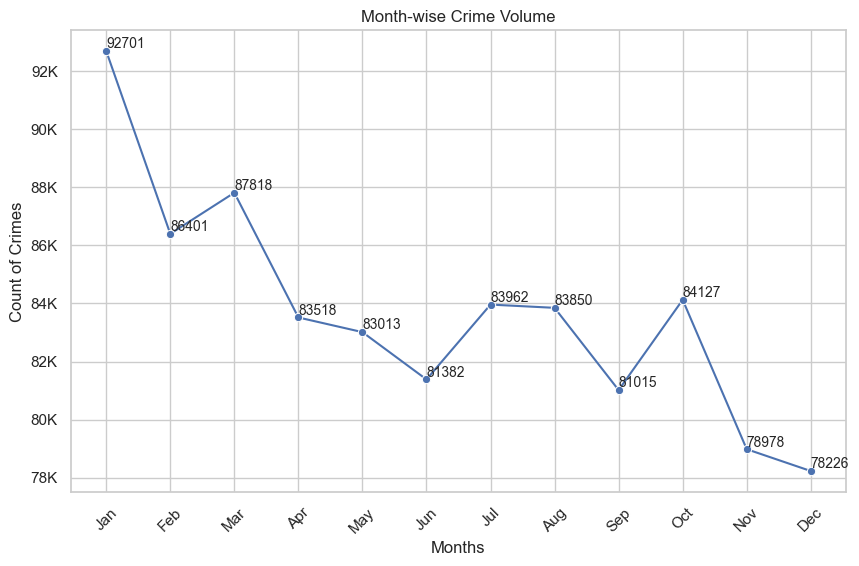

In [94]:
plt.figure(figsize=(10,6))
sns.set_theme(style='whitegrid')

ax=sns.lineplot(data=plot2,x='occ_month',y='count',marker='o')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'{int(x/1000)}K'))
plt.xlabel('Months')
plt.ylabel('Count of Crimes')
plt.setp(ax.get_xticklabels(),rotation=45)
plt.title('Month-wise Crime Volume')

[plt.text(x,y,int(y),rotation=0,va='bottom',fontsize=10) for x,y in zip(plot2['occ_month'],plot2['count'])]
plt.show()

- Day of Week and Hourly Crime Trends

In [97]:
df['occ_day']=pd.Categorical(
    df['occ_day'],
    categories=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],
    ordered=True
)
plot3=df.groupby('occ_day',observed=True).size().reset_index(name='count')
plot3

,occ_day,count
0,Mon,141543
1,Tue,138141
2,Wed,142714
3,Thu,141810
4,Fri,153676
5,Sat,147459
6,Sun,139648


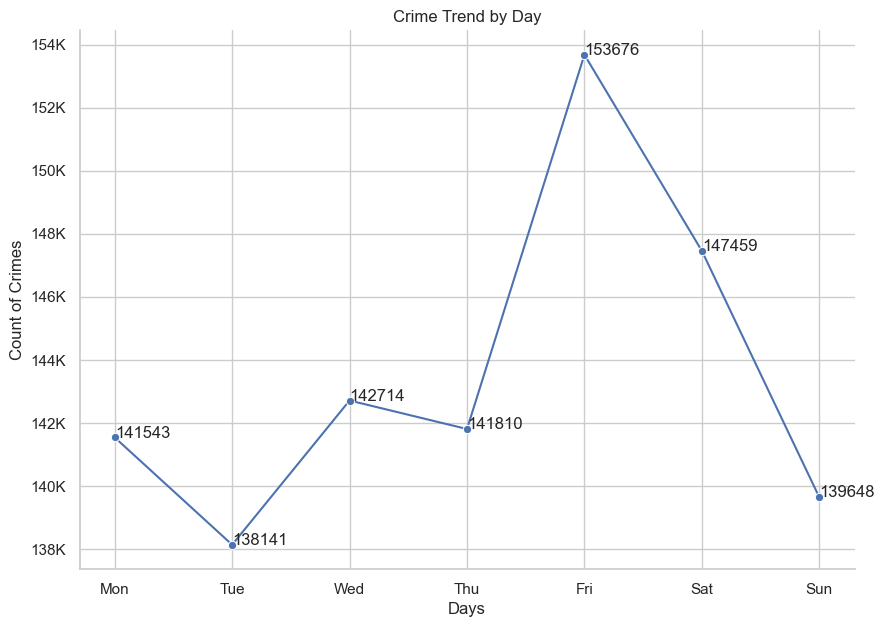

In [103]:
plt.figure(figsize=(10,7))
sns.set_theme(style='whitegrid')

ax=sns.lineplot(data=plot3,x='occ_day',y='count',marker='o')
plt.xlabel('Days')
plt.ylabel('Count of Crimes')
plt.title('Crime Trend by Day')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'{int(x/1000)}K'))

[plt.text(x,y,int(y),ha='left') for x,y in zip(plot3['occ_day'],plot3['count'])]
sns.despine()
plt.show()

In [105]:
df['TIME OCC']=df['TIME OCC'].astype(str)
df['hour']=df['TIME OCC'].str.split(':').str[0].astype(float)

bins = [0, 6, 10, 14, 18, 22, 24]
labels = ['Late Night(0-6)', 'Morning Rush(6-10)', 'Midday(10-14)', 'Afternoon(14-18)', 'Evening Rush(18-22)', 'Late Evening(22-24)']

df['time_buck']=pd.cut(df['hour'], bins=bins, labels=labels, right=False, include_lowest=True)

In [108]:
plot4=df.groupby('time_buck',observed=True).size().reset_index(name='count')
plot4

,time_buck,count
0,Late Night(0-6),153681
1,Morning Rush(6-10),123225
2,Midday(10-14),200093
3,Afternoon(14-18),213912
4,Evening Rush(18-22),222698
5,Late Evening(22-24),91382


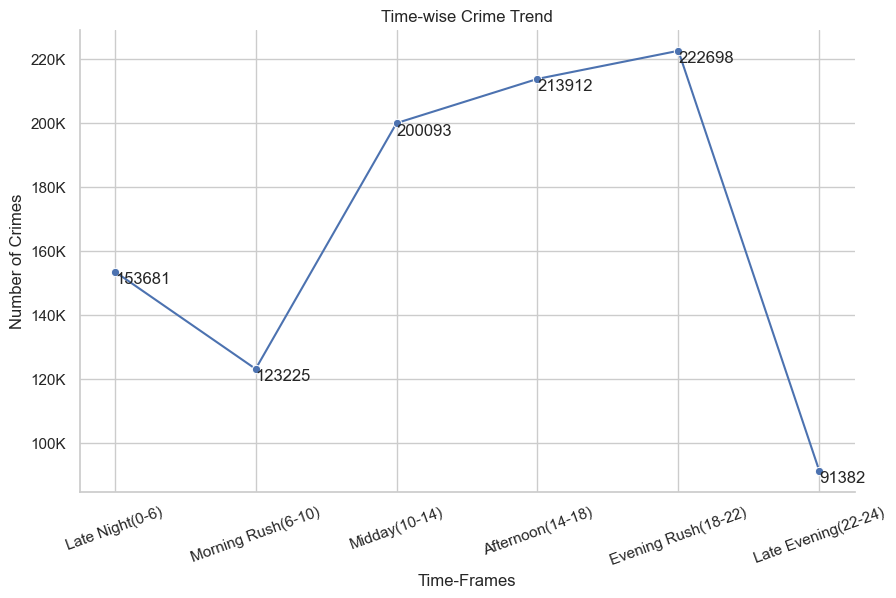

In [122]:
plt.figure(figsize=(10,6))
sns.set_theme(style='whitegrid')

ax=sns.lineplot(data=plot4,x='time_buck',y='count',marker='o')
plt.xlabel('Time-Frames')
plt.ylabel('Number of Crimes')
plt.title('Time-wise Crime Trend')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'{int(x/1000)}K'))
plt.setp(ax.get_xticklabels(),rotation=20,ha='center')

[plt.text(x,y,int(y),ha='left',va='top',rotation=0) for x,y in zip(plot4['time_buck'],plot4['count'])]

sns.despine()
plt.show()

- Reporting Delay (Date Occurred vs Date Reported)

In [132]:
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

df['delay_reporting']=(df['Date Rptd'] - df['DATE OCC']).dt.days

In [145]:
bins=[-1,0,3,7,30,90,365,float('inf')]
labels=[
    'same day',
    '1–3 days',
    '4–7 days',
    '8–30 days',
    '31–90 days',
    '91–365 days',
    '>365 days'
]

df['rep_lag']=pd.cut(df['delay_reporting'],bins=bins,labels=labels)

In [146]:
plot5=df.groupby('rep_lag',observed=True).size().reset_index(name='count')
plot5

,rep_lag,count
0,same day,482066
1,1–3 days,324370
2,4–7 days,66416
3,8–30 days,73116
4,31–90 days,31564
5,91–365 days,19936
6,>365 days,7523


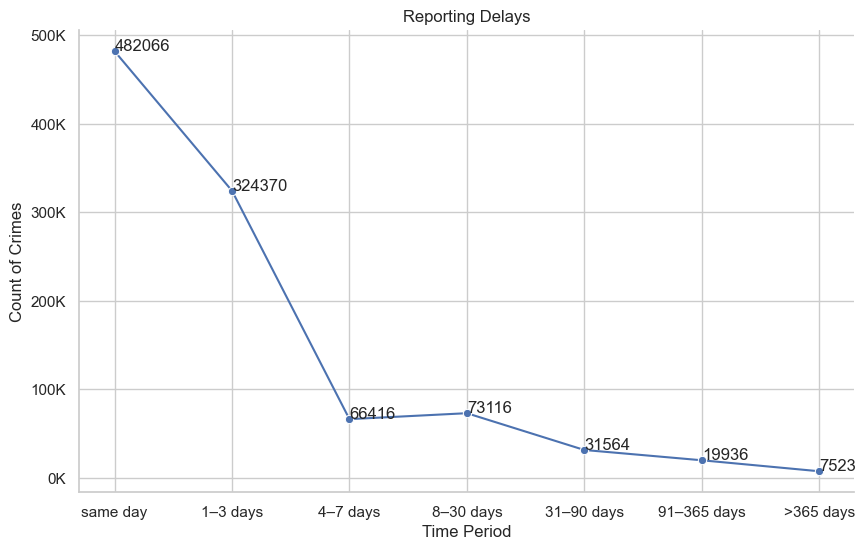

In [147]:
plt.figure(figsize=(10,6))
sns.set_theme(style='whitegrid')

ax=sns.lineplot(data=plot5,x='rep_lag',y='count',marker='o')
plt.xlabel('Time Period')
plt.ylabel('Count of Crimes')
plt.title('Reporting Delays')

[plt.text(x,y,int(y),ha='left') for x,y in zip(plot5['rep_lag'],plot5['count'])]
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'{int(x/1000)}K'))

sns.despine()
plt.show()

- Top 10 Most Frequent Crime Categories

In [153]:
plot6=df.groupby('Crm Cd Desc').size().sort_values(ascending=False).reset_index(name='count').head(10)
plot6

,Crm Cd Desc,count
0,VEHICLE - STOLEN,115190
1,BATTERY - SIMPLE ASSAULT,74839
2,BURGLARY FROM VEHICLE,63517
3,THEFT OF IDENTITY,62537
4,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",61092
5,BURGLARY,57871
6,THEFT PLAIN - PETTY ($950 & UNDER),53717
7,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",53525
8,INTIMATE PARTNER - SIMPLE ASSAULT,46712
9,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),41314


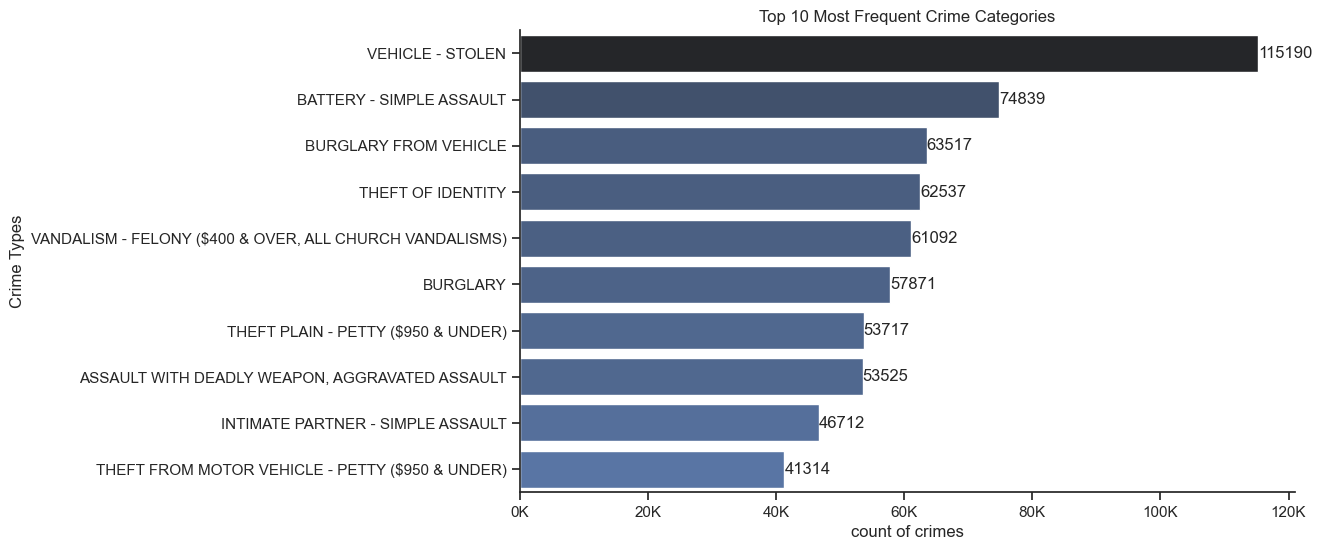

In [161]:
plt.figure(figsize=(10,6))
sns.set_theme(style='ticks')

ax=sns.barplot(data=plot6,x='count',y='Crm Cd Desc',hue='count',palette='dark:b_r')
plt.xlabel('count of crimes')
plt.ylabel('Crime Types')
plt.title('Top 10 Most Frequent Crime Categories')
ax.legend_.remove()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'{int(x/1000)}K'))

for i in ax.containers:
    ax.bar_label(i)

sns.despine()
plt.show()

- Part 1 vs Part 2 Crime Comparison

In [165]:
plot7=df.groupby('Part 1-2').size().reset_index(name='count')
plot7

,Part 1-2,count
0,1,602645
1,2,402346


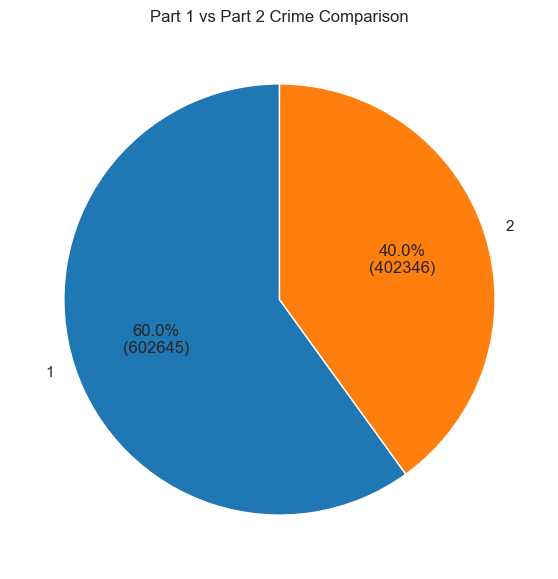

In [178]:
plt.figure(figsize=(7,7))
sns.set_theme(style='ticks')

plt.pie(
    plot7['count'],
    labels=plot7['Part 1-2'],
    autopct=lambda p: f'{p:.1f}%\n({p*sum(plot7['count'])/100:.0f})',
    startangle=90,
    wedgeprops={'edgecolor': 'white'},
    colors=plt.cm.tab10.colors)

plt.title('Part 1 vs Part 2 Crime Comparison')
plt.show()

- Area-wise Crime Distribution

In [182]:
plot8=df.groupby('AREA NAME').size().sort_values(ascending=True).reset_index(name='count')
plot8

,AREA NAME,count
0,Foothill,33133
1,Hollenbeck,37085
2,Mission,40351
3,Topanga,41374
4,Harbor,41394
5,Devonshire,41756
6,West Valley,42156
7,Van Nuys,42883
8,Northeast,42963
9,West LA,45729


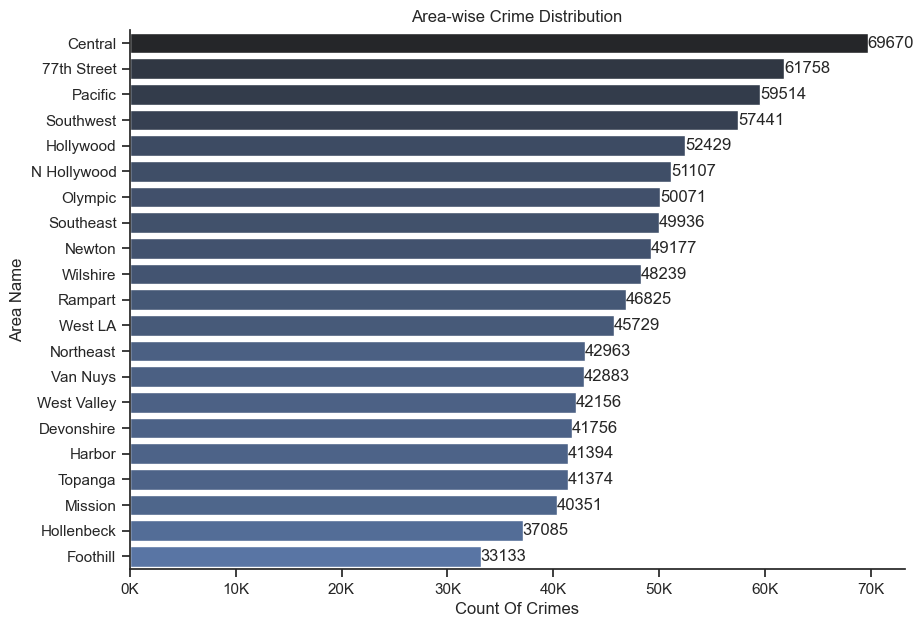

In [189]:
plt.figure(figsize=(10,7))
ax=sns.barplot(data=plot8,x='count',y='AREA NAME',hue='count',palette='dark:b_r')
ax.invert_yaxis()
plt.xlabel('Count Of Crimes')
plt.ylabel('Area Name')
plt.title('Area-wise Crime Distribution')
ax.legend_.remove()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'{int(x/1000)}K'))

for i in ax.containers:
    ax.bar_label(i)

sns.despine()
plt.show()

- Crime Trend Over Years by Area

In [207]:
plot9=df.groupby('occ_year')['AREA NAME'].value_counts().reset_index(name='count')
plot9

,occ_year,AREA NAME,count
0,2020,77th Street,13353
1,2020,Central,11604
2,2020,Pacific,11576
3,2020,Southwest,11180
4,2020,Southeast,10849
...,...,...,...
120,2025,Wilshire,2
121,2025,N Hollywood,1
122,2025,Olympic,1
123,2025,Pacific,1


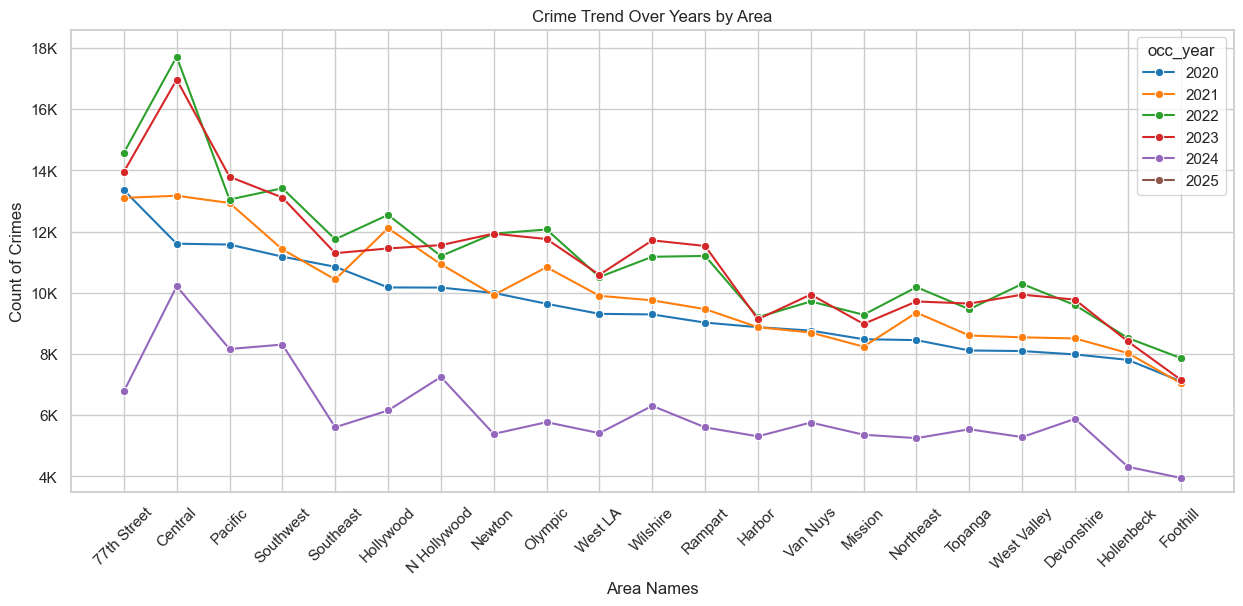

In [240]:
plt.figure(figsize=(15,6))
sns.set_theme(style='whitegrid')

ax=sns.lineplot(data=plot9,x='AREA NAME',y='count',hue='occ_year',marker='o',palette='tab10')
plt.setp(ax.get_xticklabels(),rotation=45,ha='center')
plt.ylabel('Count of Crimes')
plt.xlabel('Area Names')
plt.title('Crime Trend Over Years by Area')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'{int(x/1000)}K'))
plt.ylim(3500)
plt.show()